In [0]:
SEARCH_CONTAINING=1
SEARCH_FINDING=2

In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [0]:
class Cell():
  def __init__(self,row,col):
    self.prob=1/2500
    self.row=row
    self.col=col
    self.terrain=self.random_terrain()
    
  def random_terrain(self):
    p=random.random()
    if p<0.2:
      return "flat"
    if p<0.5:
      return "hilly"
    if p<0.8:
      return "forested"
    else:
      return "caves"
  
  def get_prob(self):
    return self.prob
  
  def get_row(self):
    return self.row
  
  def get_col(self):
    return self.col

  def set_prob(self,prob):
    self.prob=prob
  
  def get_terrain(self):
    return self.terrain


In [0]:
class Map():
  def __init__(self):
    self.map=[[Cell(j,i) for i in range(50)]for j in range (50)]
    self.target=self.generate_target()
    #self.print_map()

  def generate_target(self):
    rand_row=random.randint(0,49)
    rand_col=random.randint(0,49)
    return [rand_row,rand_col]
    
  def get_target(self):
    return self.target

  def print_map(self):
    b = [['?'for i in range(50)] for j in range(50)]
    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')
    for i in range(50):
      for j in range(50):
            if(self.map[i][j].get_terrain() =="flat"):
              b[i][j] = 'f'
            elif(self.map[i][j].get_terrain() == "hilly"):
              b[i][j] ='h'
            elif(self.map[i][j].get_terrain() == "forested"):
              b[i][j] ='t'
            elif(self.map[i][j].get_terrain() == "caves"):
              b[i][j] = "c"
            elif(self.map[i][j].get_terrain() == "target"):
              b[i][j] = "x"
    the_table = ax.table(cellText = b, colWidths = [0.04 for x in range(50)])
    plt.show()

  def get_map(self):
    return self.map

In [0]:
def argmax(a):
    ind = np.unravel_index(np.argmax(a, axis=None), a.shape)
    return ind

In [0]:
class Stationary():
  def __init__(self):
    self.map=Map()
    self.target=self.map.get_map()[random.randint(0,49)][random.randint(0,49)]
    self.step_counter=0
    
  def get_target(self):
    return self.target
  
  def rand_source(self):
    return self.map.get_map()[random.randint(0,49)][random.randint(0,49)]

  def search(self,search_way):
    target_found=False
    while not target_found:
      self.step_counter+=1
      if search_way==1:
        search_target=self.get_highest_containing()
      elif search_way==2:
        search_target=self.get_highest_finding()
      else:
        return 0
      search_prob=search_target.get_prob()
      not_found_prob=self.get_notfound_prob(search_target.get_terrain())
      if search_target==self.get_target():
        if random.random()>not_found_prob:
          target_found=True
          print("Target Found in"+ str(search_target.get_row())+"，"+str(search_target.get_col()))
          print("steps"+str(self.step_counter))
          return 
      if target_found==False:
        for cells in self.map.get_map():
          for cell in cells:
            cell.set_prob(cell.get_prob()/(1+search_prob*not_found_prob-search_prob))
        search_target.set_prob(cell.get_prob()*search_prob/(1+search_prob*not_found_prob-search_prob))
        self.normalize_prob()

  def move(self,cur_loc,target):
    dist=abs(target.get_row()-cur_loc.get_row())+abs(target.get_col()-cur_loc.get_col())
    self.step_counter+=(dist+1)


  def move_and_search(self,rand_source,alpha=1,beta=0,strategy="local"):
    target_found=False
    self.step_counter=0
    source=rand_source
    cur_loc=source
    # print("random source:",cur_loc.get_row(),cur_loc.get_col())

    if strategy=="rule_1": # ******************************
      print("strategy:rule 1") # ******************************
    elif strategy=="rule_2": # ******************************
      print("strategy:rule 2") # ******************************
    elif strategy=="local": # ******************************
      print("strategy:local") # ******************************

    while not target_found==True:

      if strategy=="rule_1":
        search_target=self.get_highest_containing()
      elif strategy=="rule_2":
        search_target=self.get_highest_finding()
      elif strategy=="local":
        search_target=self.get_highest_score(cur_loc,alpha=1,beta=0)

      self.move(cur_loc,search_target)
      search_prob=search_target.get_prob()
      not_found_prob=self.get_notfound_prob(search_target.get_terrain())
      if search_target==self.get_target():
        if random.random()>not_found_prob:
          target_found=True
          print("Target Found in"+ str(search_target.get_row())+"，"+str(search_target.get_col())) # ******************************
          print("steps"+str(self.step_counter)) # ******************************
          return 
      if target_found==False:
        for cells in self.map.get_map():
          for cell in cells:
            cell.set_prob(cell.get_prob()/(1+search_prob*not_found_prob-search_prob))
        search_target.set_prob(cell.get_prob()*search_prob/(1+search_prob*not_found_prob-search_prob))
        self.normalize_prob()
        cur_loc=search_target

  def get_highest_containing(self):
    prob=0
    search_list=[]
    for cells in self.map.get_map():
      for cell in cells:
        if cell.get_prob()>prob:
          prob=cell.get_prob()
          search_list.clear()
          search_list.append(cell)
        elif cell.get_prob()==prob:
          search_list.append(cell)
    search_cell=search_list[random.randint(0,len(search_list)-1)]
    return search_cell

  def get_highest_finding(self):
    prob=0
    search_list=[]
    for cells in self.map.get_map():
      for cell in cells:
        current_prob=cell.get_prob()*(1-self.get_notfound_prob(cell.get_terrain()))
        if current_prob>prob:
          prob=cell.get_prob()
          search_list.clear()
          search_list.append(cell)
        elif cell.get_prob==prob:
          search_list.append(cell)
    search_cell=search_list[random.randint(0,len(search_list)-1)]
    return search_cell

  def get_highest_score(self,cur_loc,alpha=1,beta=0):
    score=np.array([[0 for i in range(50)] for j in range(50)]).astype(float)
    for row in range(50):
      for col in range(50):
        if row==cur_loc.get_row() and col==cur_loc.get_col():
          continue
        not_found_prob=self.get_notfound_prob(self.map.get_map()[row][col].get_terrain())
        dist=abs(row-cur_loc.get_row())+abs(col-cur_loc.get_col())
        # print("not_found_prob=",not_found_prob)
        # print("dist=",dist)
        local_score=(1-not_found_prob)*self.map.get_map()[row][col].get_prob()/dist
        # print("local=",local)
        global_score=0
        score[row,col]=alpha*local_score+beta*global_score
        # print("scoreij=",score[row,col])
    x,y=argmax(score)
    # print("go to:",x,y,"score:",score[x,y],"dist=",abs(x-cur_loc.get_row())+abs(y-cur_loc.get_col()))
    return self.map.get_map()[x][y]


  def normalize_prob(self):
    prob_sum=0
    for cells in self.map.get_map():
      for cell in cells:
        prob_sum+=cell.get_prob()
    factor=1/prob_sum
    for cells in self.map.get_map():
      for cell in cells:
        cell.set_prob(cell.get_prob()*factor)
  
  def get_notfound_prob(self,terrain):
    if terrain=="flat":
      return 0.1
    elif terrain=="hilly":
      return 0.3
    elif terrain=="forested":
      return 0.7
    elif terrain=="caves":
      return 0.9
    else:
      return "wrong"

      

      


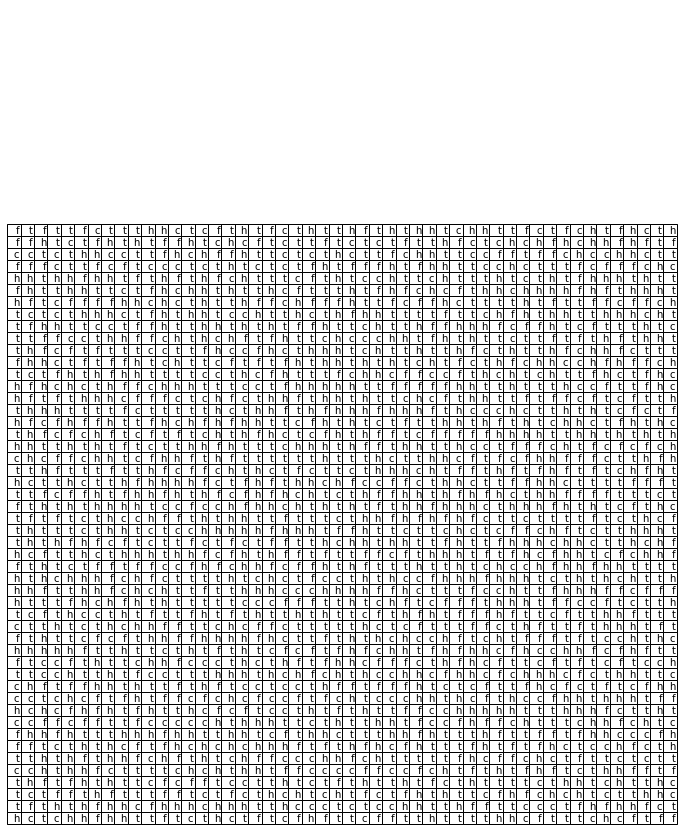

Sample
Target Found in38，48
steps3145
Target Found in38，48
steps3186


In [23]:
s=Stationary()
s.map.print_map()
src=s.rand_source()
print("Sample")
s.search(1)
s.search(2)

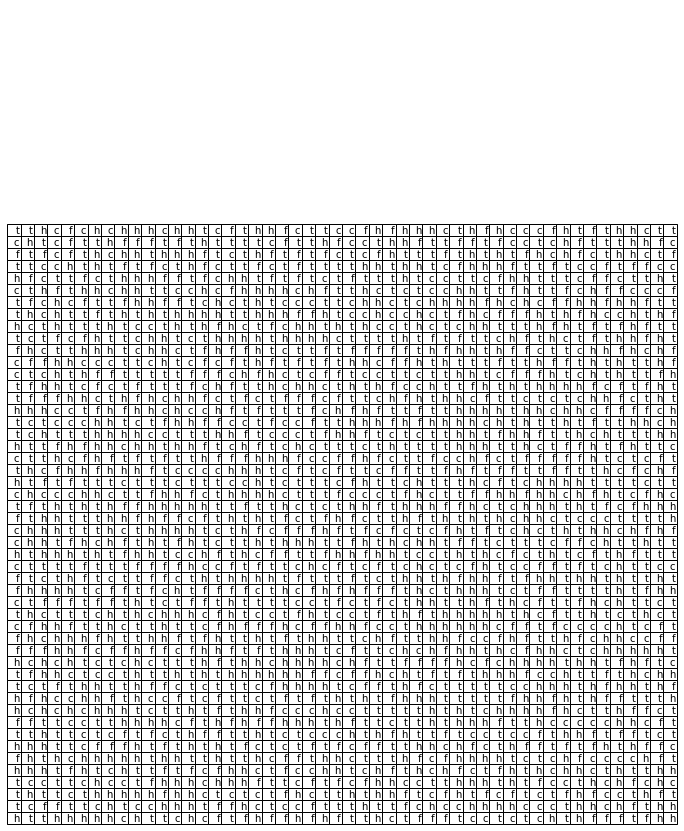

Sample (Movement Counted)
strategy:local
Target Found in4，23
steps71277
strategy:rule 1
Target Found in4，23
steps138710
strategy:rule 2
Target Found in4，23
steps464848


In [24]:
s=Stationary()
s.map.print_map()
src=s.rand_source()
print("Sample (Movement Counted)")
s.move_and_search(src,alpha=1,beta=0,strategy="local")
s.move_and_search(src,alpha=1,beta=0,strategy="rule_1")
s.move_and_search(src,alpha=1,beta=0,strategy="rule_2")

In [0]:
# sum_local=0
# sum_rule1=0
# sum_rule2=0
# for i in range(100):
#   print
#   print("iteration:",i+1," out of 100")
#   s=Stationary()
#   src=s.rand_source()
#   s.move_and_search(src,alpha=1,beta=0,strategy="local")
#   print("local:",s.step_counter)
#   sum_local+=s.step_counter
#   s.move_and_search(src,alpha=1,beta=0,strategy="rule_1")
#   print("rule 1:",s.step_counter)
#   sum_rule1+=s.step_counter
#   s.move_and_search(src,alpha=1,beta=0,strategy="rule_2")
#   print("rule 2:",s.step_counter,"\n")
#   sum_rule2+=s.step_counter
# mean_local=sum_local/100
# print("strategy local:",mean_local)
# mean_rule1=sum_rule1/100
# print("strategy rule1:",mean_rule1)
# mean_rule2=sum_rule2/100
# print("strategy rule2:",mean_rule2)